In [1]:
%pylab inline
from scipy.fftpack import fft, ifft, fftfreq, fftshift
from scipy.io import wavfile

Populating the interactive namespace from numpy and matplotlib


1.

/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: ComplexWarning: Casting complex values to real discards the imaginary part


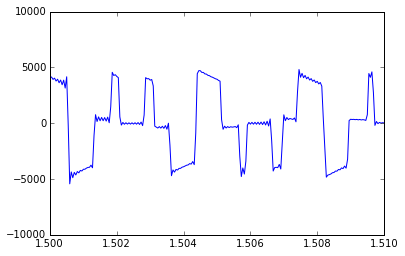

In [2]:
data = np.genfromtxt('ring.dft', dtype = complex)

inversa = ifft(data)
inversa = int16(inversa) # Descarta por sí misma la parte compleja, que es insignificante
sample_rate = 22050.

# Tiempos en los que se midió la señal
ts = np.linspace(0, len(inversa) / sample_rate, len(inversa))

# Gráfica del enunciado
plt.plot(ts, inversa)
plt.axis([1.5, 1.510, -10000, 10000])

# Exportación de archivo
wavfile.write('audio.wav', sample_rate, inversa)

2.

a.

[1.5, 1.51, -10000, 10000]

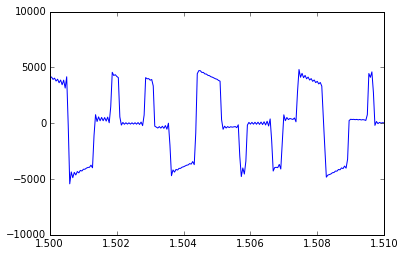

In [3]:
import scipy.interpolate

# Interpolción lineal de la señal
interpolacion = scipy.interpolate.interp1d(ts, inversa, kind = 'linear')

# Tiempos en los que se mide la señal, con longitud el doble menos 1 de la 
# anterior para agregar puntos intermedios
ts_nuevo = np.linspace(0, len(inversa) / sample_rate, len(inversa) * 2 - 1)

# Cálculo de la señal de acuerdo a la interpolación anterior, en
# todos los puntos
inversa_nuevo = interpolacion(ts_nuevo)

# Gráfica de confirmación de la señal obtenida
plt.plot(ts_nuevo, inversa_nuevo)
plt.axis([1.5, 1.510, -10000, 10000])

b.

In [4]:
# Multiplicación de la señal anterior por un valor que toma un valor de 1 al inicio, y 0 al final
# basado en la longitud del array
inversa_volumen = array([inversa_nuevo[i] / (len(inversa_nuevo) - 1.) * (len(inversa_nuevo) - i - 1.) for i in range(len(inversa_nuevo))])

# Conversión de int16 para la exportación
inversa_3 = int16(inversa_volumen)

# Exportación del archivo
wavfile.write('audio_final.wav', sample_rate, inversa_3)